In [ ]:
# comparative study

In [27]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
import warnings
warnings.filterwarnings('ignore')

In [30]:

df = pd.read_csv("loan_data.csv")

In [31]:
# Encode target
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

df = df.dropna()
#  Features & Target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#  Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}
    print(f"\n{name}")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Confusion Matrix:
 [[11 17]
 [ 0 68]]

SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96

Confusion Matrix:
 [[ 0 28]
 [ 0 68]]

Decision Tree
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        28
           1       0.81      0.76      0.79        68

    accuracy                           0.71        96
   macro av

In [35]:
#  Results Table
df_metrics = pd.DataFrame(results).T
print("\n📊 Model Performance:\n", df_metrics)


📊 Model Performance:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.822917   0.800000  1.000000  0.888889
SVM                  0.708333   0.708333  1.000000  0.829268
Decision Tree        0.708333   0.812500  0.764706  0.787879
KNN                  0.802083   0.788235  0.985294  0.875817
Random Forest        0.812500   0.797619  0.985294  0.881579


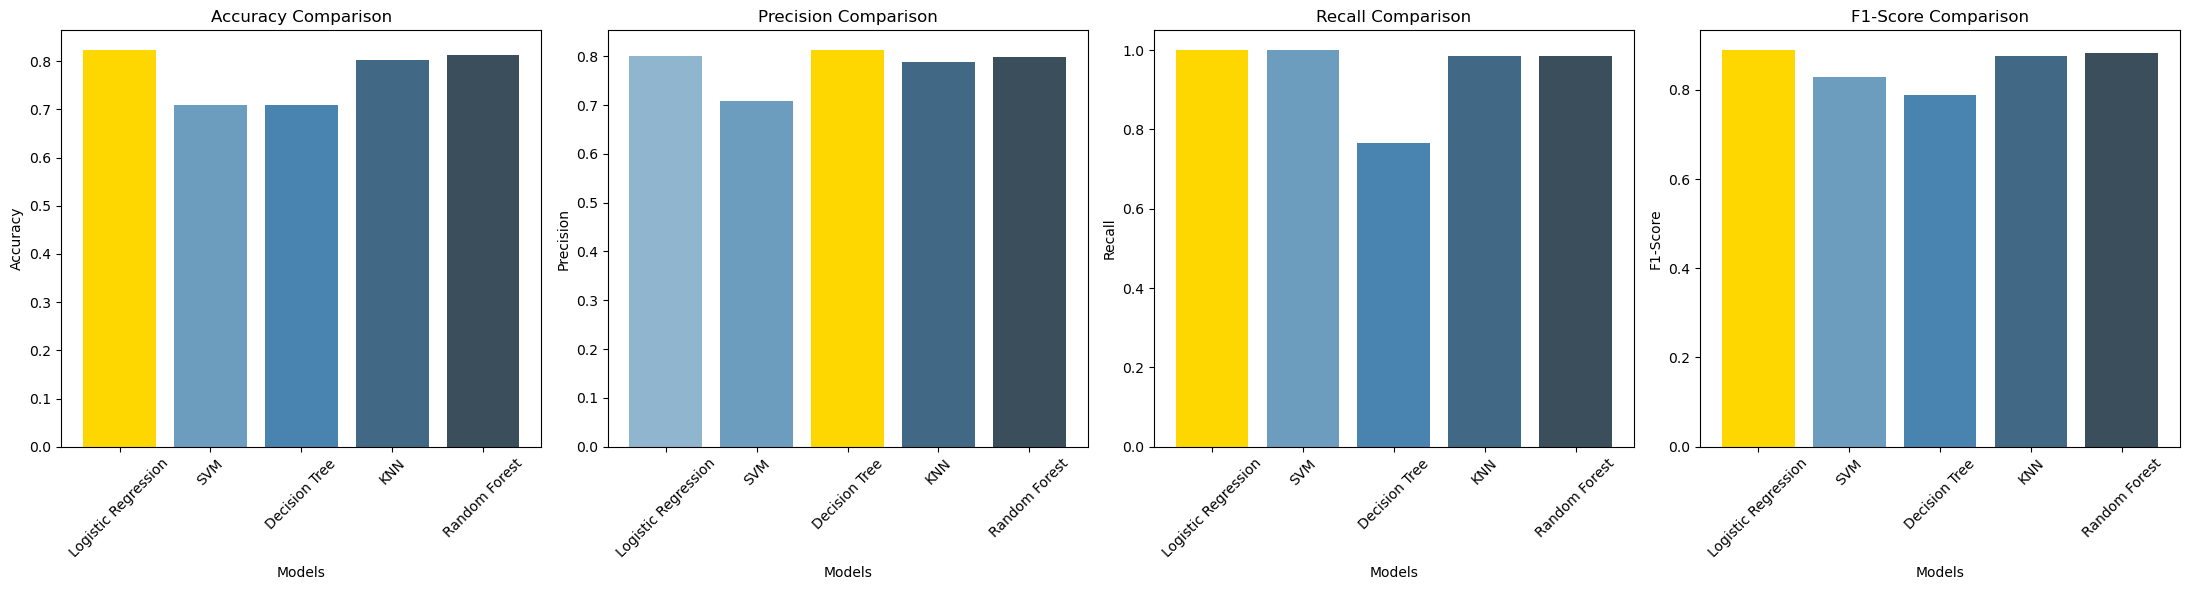

In [36]:
# Plot Comparison Charts
fig, axes = plt.subplots(1, 4, figsize=(22,6))

for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1-Score"]):
    sns.barplot(x=df_metrics.index, y=df_metrics[metric], ax=axes[i], palette="Blues_d")
    best_model = df_metrics[metric].idxmax()
    best_value = df_metrics[metric].max()
    axes[i].bar(df_metrics.index.get_loc(best_model), best_value, color="gold")
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("Models")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
# Select Best Model (by Accuracy here)
best_model = df_metrics["Accuracy"].idxmax()
best_model_instance = models[best_model]
print(f"\n🏆 Best Model: {best_model} with Accuracy {df_metrics['Accuracy'].max():.2f}")


🏆 Best Model: Logistic Regression with Accuracy 0.82


In [39]:
# Interactive Prediction with Input Validation
def get_applicant_input():
    print("\n--- Enter New Applicant Details ---")
    try:
        Gender = int(input("Gender (0=Female, 1=Male): "))
        Married = int(input("Married (0=No, 1=Yes): "))
        Dependents = int(input("Number of Dependents (0-3): "))
        Education = int(input("Education (0=Graduate, 1=Not Graduate): "))
        Self_Employed = int(input("Self Employed (0=No, 1=Yes): "))
        ApplicantIncome = float(input("Applicant Income: "))
        CoapplicantIncome = float(input("Coapplicant Income: "))
        LoanAmount = float(input("Loan Amount: "))
        Loan_Amount_Term = float(input("Loan Amount Term (in months): "))
        Credit_History = int(input("Credit History (0=No, 1=Yes): "))
        Property_Area = int(input("Property Area (0=Rural,1=Semiurban,2=Urban): "))

        # Check ranges
        if Gender not in [0,1] or Married not in [0,1] or Education not in [0,1] or \
           Self_Employed not in [0,1] or Credit_History not in [0,1] or \
           Property_Area not in [0,1,2] or Dependents not in [0,1,2,3]:
            print("⚠️ Invalid categorical input! Please try again.\n")
            return None

        # Build dataframe
        applicant = pd.DataFrame([[Gender, Married, Dependents, Education, Self_Employed,
                                   ApplicantIncome, CoapplicantIncome, LoanAmount,
                                   Loan_Amount_Term, Credit_History, Property_Area]],
                                 columns=X.columns)

        # Scale
        applicant_scaled = pd.DataFrame(scaler.transform(applicant), columns=X.columns)
        return applicant_scaled

    except ValueError:
        print("⚠️ Invalid input type! Please enter numeric values only.\n")
        return None

In [43]:
import pandas as pd

# original feature names before encoding
raw_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']

def get_valid_input(prompt, dtype=int, allowed_values=None):
    """Utility to get valid typed input"""
    while True:
        try:
            val = dtype(input(prompt))
            if allowed_values is not None and val not in allowed_values:
                print(f"Allowed values are: {allowed_values}")
                continue
            return val
        except ValueError:
            print(f"Enter a valid {dtype.__name__}")

def get_applicant_input():
    """Collects raw applicant data, encodes, scales and returns the row ready for prediction"""
    Gender = get_valid_input("Gender (0=Male,1=Female): ", int, allowed_values=[0,1])
    Married = get_valid_input("Married (0=No,1=Yes): ", int, allowed_values=[0,1])
    Dependents = get_valid_input("Dependents (0,1,2,3): ", int, allowed_values=[0,1,2,3])
    Education = get_valid_input("Education (0=Graduate,1=Not Graduate): ", int, allowed_values=[0,1])
    Self_Employed = get_valid_input("Self Employed (0=No,1=Yes): ", int, allowed_values=[0,1])
    ApplicantIncome = get_valid_input("Applicant Income: ", float)
    CoapplicantIncome = get_valid_input("Coapplicant Income: ", float)
    LoanAmount = get_valid_input("Loan Amount: ", float)
    Loan_Amount_Term = get_valid_input("Loan Amount Term: ", float)
    Credit_History = get_valid_input("Credit History (0=No,1=Yes): ", int, allowed_values=[0,1])
    Property_Area = get_valid_input("Property Area (0=Rural,1=Semiurban,2=Urban): ", int, allowed_values=[0,1,2])

    # build raw dataframe
    applicant_raw = pd.DataFrame([[Gender, Married, Dependents, Education, Self_Employed,
                                   ApplicantIncome, CoapplicantIncome, LoanAmount,
                                   Loan_Amount_Term, Credit_History, Property_Area]],
                                 columns=raw_features)

    # encode categorical same as training
    applicant_encoded = pd.get_dummies(applicant_raw)

    # align columns with training (X.columns)
    applicant_encoded = applicant_encoded.reindex(columns=X.columns, fill_value=0)

    # scale same as training
    applicant_scaled = scaler.transform(applicant_encoded)

    return applicant_scaled



new_applicant_scaled = get_applicant_input()
prediction = model.predict(new_applicant_scaled)[0]   # get single value (0 or 1)


if prediction == 1:
    print("\n✅ Loan Approved for this applicant.")
else:
    print("\n❌ Loan Not Approved for this applicant.")




Gender (0=Male,1=Female):  1
Married (0=No,1=Yes):  1
Dependents (0,1,2,3):  2
Education (0=Graduate,1=Not Graduate):  1
Self Employed (0=No,1=Yes):  1
Applicant Income:  600000
Coapplicant Income:  800000
Loan Amount:  500000
Loan Amount Term:  15
Credit History (0=No,1=Yes):  1
Property Area (0=Rural,1=Semiurban,2=Urban):  1



❌ Loan Not Approved for this applicant.
